##Import necessary libraries

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

Using TensorFlow backend.


##Load & Prep Dataset

In [0]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [0]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

##Build Model

In [0]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (5, 5),strides=1,padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2),strides=2))
  model.add(Conv2D(32, (5, 5),strides=1,padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2),strides=2))
  model.add(Conv2D(64, (5, 5),strides=1,padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model
 


In [0]:
# evaluate a model using k-fold cross-validation
def evaluate_model(model, dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=1, batch_size=100, validation_data=(testX, testY), verbose=1)
		# evaluate model
		_, acc = model.evaluate(testX, testY,batch_size=100, verbose=1)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [0]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	#pyplot.boxplot(scores)
	#pyplot.show()

In [0]:
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # evaluate model
    scores, histories = evaluate_model(model, trainX, trainY)
    print(histories)
    # summarize estimated performance
    summarize_performance(scores)
    model.save('final_model.h5')

In [22]:
# entry point, run the test harness
run_test_harness()

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
12000/12000 [==============================] - 1s 56us/step
> 98.092
Train on 48000 samples, validate on 12000 samples
Epoch 1/1
12000/12000 [==============================] - 1s 55us/step
> 98.792
Train on 48000 samples, validate on 12000 samples
Epoch 1/1
12000/12000 [==============================] - 1s 54us/step
> 98.917
Train on 48000 samples, validate on 12000 samples
Epoch 1/1
12000/12000 [==============================] - 1s 55us/step
> 99.458
Train on 48000 samples, validate on 12000 samples
Epoch 1/1
12000/12000 [==============================] - 1s 55us/step
> 99.517
[<keras.callbacks.callbacks.History object at 0x7fb330459c88>, <keras.callbacks.callbacks.History object at 0x7fb33041f5f8>, <keras.callbacks.callbacks.History object at 0x7fb33041f828>, <keras.callbacks.callbacks.History object at 0x7fb33041f860>, <keras.callbacks.callbacks.History object at 0x7fb33041fb70>]
Accuracy: mean=98.955 std=0.518, n=5


##Test Image

Saving 8.png to 8 (1).png


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Prediction: 8


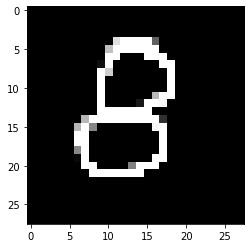

In [36]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt
import 

def load_image(filename):
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    plt.imshow(img,cmap='gray')
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    return img

def run_example():
  uploaded = files.upload()
  img = load_image('8.png')
  
  model = load_model('final_model.h5')
  digit = model.predict_classes(img)
  print("Prediction:",digit[0])
 

run_example()